In [25]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# read in the data
data = pd.read_csv('../data/US_Accidents_March23_sampled_500k.csv')
data.shape

(500000, 46)

Let's see the variables in our data and decide which will we our target variable.

In [27]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

The target variable will be 'Severity', this is how important, the gravity of the accident, in order to predict how does it affect the traffic.

First we take off some variables which we consider may not explain the target.

In [28]:
data_w_c = data.drop(columns=['ID', 'Source', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Weather_Timestamp'])
data_w_c.shape

(500000, 35)

Let's see how our data is distributed.

In [29]:
data_w_c.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


The Start_Time and End_Time variables cause some problems since they are strings and are difficult to compute. In order to avoid further problems we will create a new variable called Elapsed_Time, which will be the difference between End_Time and Start_Time.

In [30]:
def time_difference(data_w_c: pd.DataFrame) -> list[int]:
    """Calculates the time difference between the start and end time of each accident in seconds."""
    time_elapsed: list[int] = list()
    for start_time, end_time in zip(data_w_c['Start_Time'], data_w_c['End_Time']):
        start_year = int(start_time[:4]) 
        end_year = int(end_time[:4])
        elapsed_years = end_year - start_year
        start_month = int(start_time[5:7])
        end_month = int(end_time[5:7])
        elapsed_months = end_month - start_month
        start_day = int(start_time[8:10])
        end_day = int(end_time[8:10])
        elapsed_days = end_day - start_day
        start_hour = int(start_time[11:13])
        end_hour = int(end_time[11:13])
        elapsed_hours = end_hour - start_hour
        start_minute = int(start_time[14:16])
        end_minute = int(end_time[14:16])
        elapsed_minutes = end_minute - start_minute
        start_second = int(start_time[17:19])
        end_second = int(end_time[17:19])
        elapsed_seconds = end_second - start_second
        time_elapsed.append(elapsed_years*31536000 + elapsed_months*2592000 + elapsed_days*86400 + elapsed_hours*3600 + elapsed_minutes*60 + elapsed_seconds)
    return time_elapsed

In [31]:
data_w_c['Time_Difference'] = pd.DataFrame(time_difference(data_w_c))
data_w_c.shape

(500000, 36)

Now that we have this information in this new variable, we can take off 'Start_Time' and 'End_Time'.

In [32]:
data_w_c = data_w_c.drop(columns=['Start_Time', 'End_Time'])
data_w_c.shape

(500000, 34)

FALTA SEGUIR CON LOS NAN'S Y VER SI HAY VALORES EXTRAÑOS.

EXPLICACIÓN UN POCO DE ESTOS DATOS, LOS 0, VALORES MUY GRANDES, NANS, ETC.

SEARCHING NAN'S

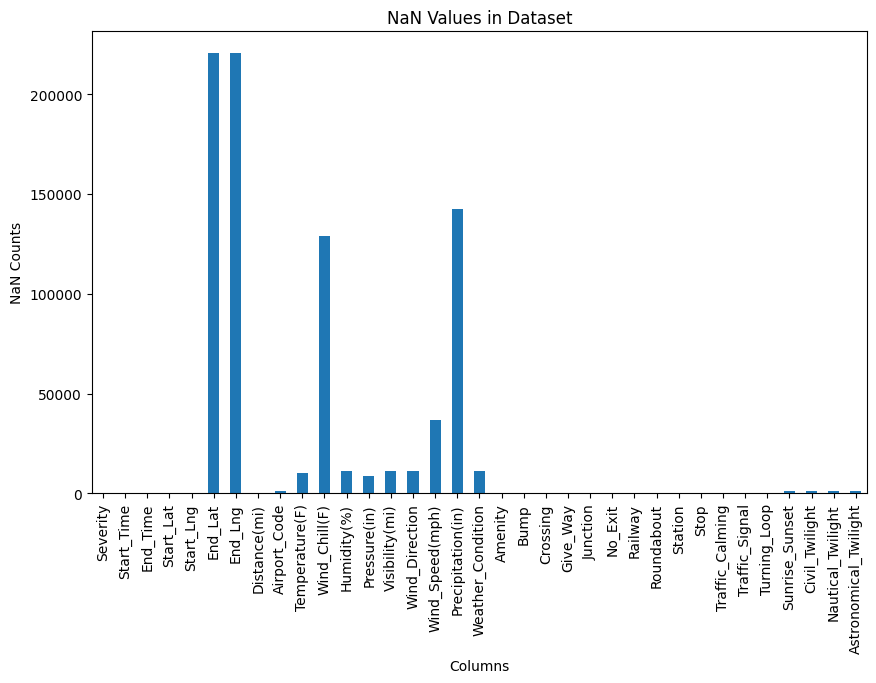

In [13]:
# nan histogram
nan_counts = data_w_c.isna().sum()
nan_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Columns')
plt.ylabel('NaN Counts')
plt.title('NaN Values in Dataset')
plt.show()

In [32]:
columns_with_nan = ['End_Lat', 'End_Lng', 'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
subset_data_w_c = data_w_c.drop(columns=columns_with_nan)

In [33]:
subset_data_w_c.shape

(500000, 19)

In [34]:
data_w_c.shape

(500000, 35)

In [45]:
#Seguir lo que se dice en el notebook 1 pre-processing
list_not_missing = []
list_missing = []
knn = KNeighborsClassifier(n_neighbors=1)
imputed_values_list = []

for column in columns_with_nan:

    rows_not_missing = data_w_c[column].notna()
    rows_missing = data_w_c[column].isna()

    data_w_c_without_missing = subset_data_w_c[rows_not_missing]

    knn.fit(data_w_c_without_missing, data_w_c[column][rows_not_missing])
    imputed_values = knn.predict(subset_data_w_c[rows_missing])

    data_w_c[column][rows_missing] = imputed_values

    imputed_values_list.append(imputed_values)
    list_not_missing.append(rows_not_missing)
    list_missing.append(rows_missing)

data_w_c.isna().sum()  

ValueError: could not convert string to float: '2022-12-03 23:37:14.000000000'

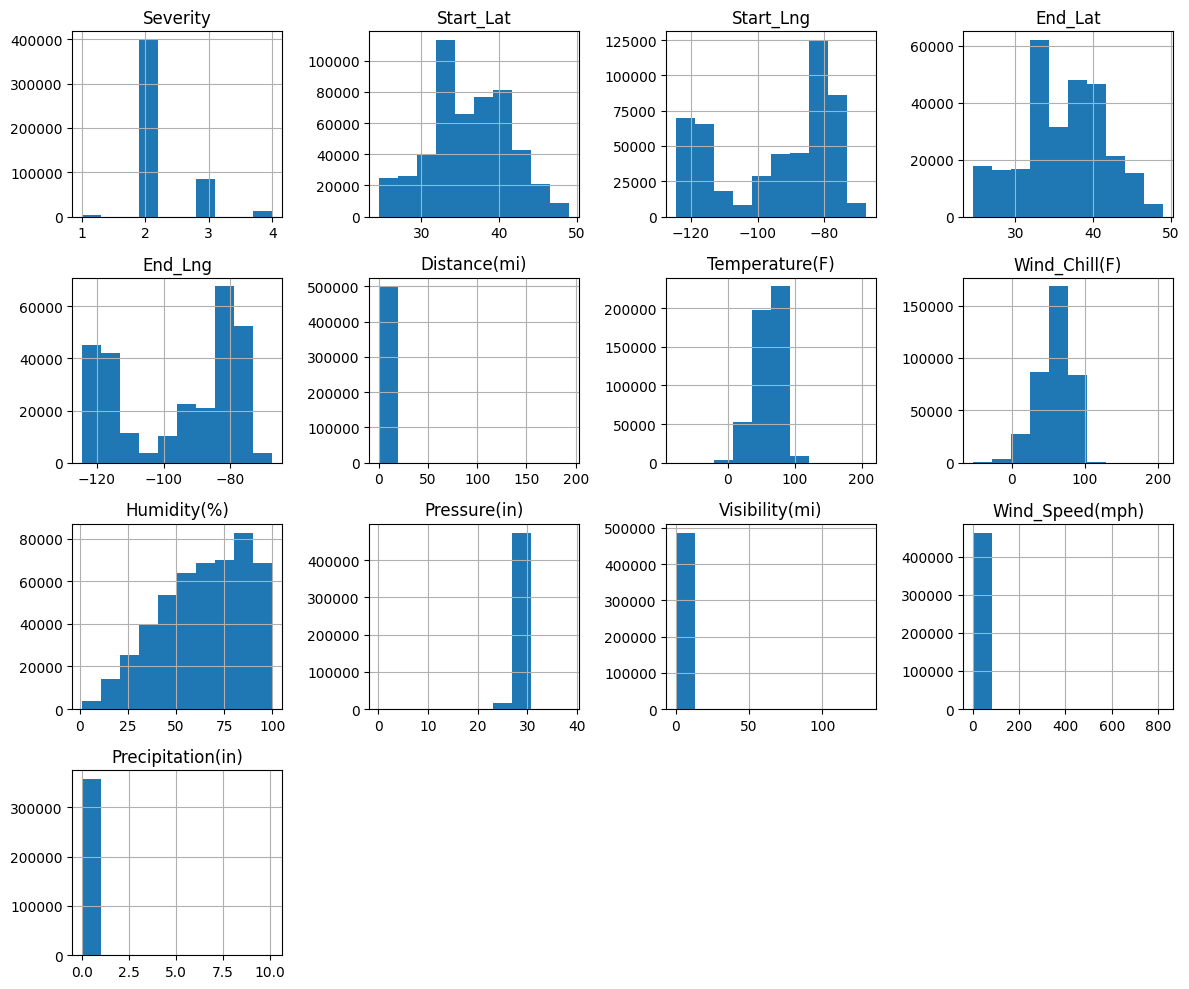

In [4]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()